In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

KAYNAK===> https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=emm_epm0_pte_nus_dpg&f=m

In [2]:
df = pd.read_csv("U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv")
df.head()

,Date,Prices
0,Oct 2022,3.935
1,Sep 2022,3.817
2,Aug 2022,4.087
3,Jul 2022,4.668
4,Jun 2022,5.032


In [3]:
df.shape

(355, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    355 non-null    object 
 1   Prices  355 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Prices,355.0,2.293558,0.9315,0.962,1.4195,2.316,2.9445,5.032


In [6]:
df.sort_values("Date")

,Date,Prices
354,Apr 1993,1.078
342,Apr 1994,1.027
330,Apr 1995,1.157
318,Apr 1996,1.275
306,Apr 1997,1.244
...,...,...
49,Sep 2018,2.915
37,Sep 2019,2.681
25,Sep 2020,2.274
13,Sep 2021,3.272


In [7]:
aylar = []
yillar = []
def parcala(x):
    for i in x:
        aylar.append(i.split()[0])
        yillar.append(int(i.split()[1]))

In [8]:
tarih = df["Date"]

In [9]:
parcala(tarih)
print(aylar[0:5])
print(yillar[0:5])

['Oct', 'Sep', 'Aug', 'Jul', 'Jun']
[2022, 2022, 2022, 2022, 2022]


In [11]:
fiyatlar = df["Prices"][::-1]
fiyatlar = fiyatlar.reset_index(drop = True)
fiyatlar

0      1.078
1      1.100
2      1.097
3      1.078
4      1.062
       ...  
350    5.032
351    4.668
352    4.087
353    3.817
354    3.935
Name: Prices, Length: 355, dtype: float64

In [12]:
df["Ay"] = aylar[::-1]
df["Yıl"] = yillar[::-1]
df["Petrol Fiyatı"] = fiyatlar
df.drop(columns = ["Date","Prices"], axis = 1, inplace=True)
df.head()

,Ay,Yıl,Petrol Fiyatı
0,Apr,1993,1.078
1,May,1993,1.100
2,Jun,1993,1.097
3,Jul,1993,1.078
4,Aug,1993,1.062


In [14]:
df = df.set_index(["Yıl","Ay"])

In [15]:
df

Petrol Fiyatı
Yıl  Ay                
1993 Apr          1.078
     May          1.100
     Jun          1.097
     Jul          1.078
     Aug          1.062
...                 ...
2022 Jun          5.032
     Jul          4.668
     Aug          4.087
     Sep          3.817
     Oct          3.935

[355 rows x 1 columns]

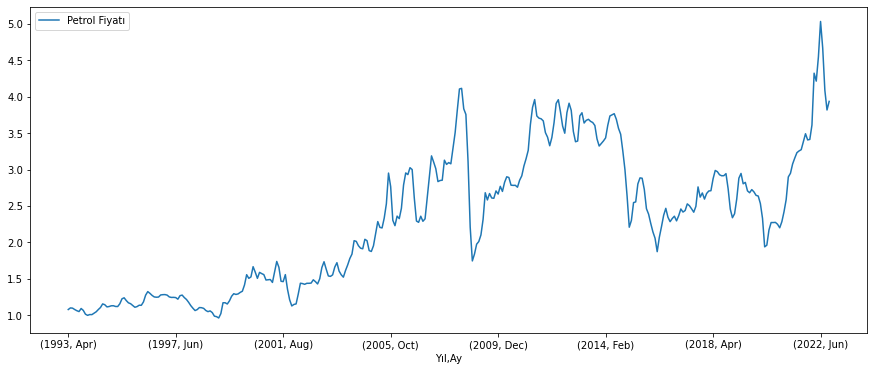

In [26]:
df.plot(figsize = (15,6));

In [30]:
df2 = df["Petrol Fiyatı"]
df2 = df2.reset_index(drop=True)
df2

0      1.078
1      1.100
2      1.097
3      1.078
4      1.062
       ...  
350    5.032
351    4.668
352    4.087
353    3.817
354    3.935
Name: Petrol Fiyatı, Length: 355, dtype: float64

In [101]:
df2.shape

(355,)

### Scaling

Elimde pandas series var ama scaler bunu kabul etmiyor. O yüzden numpay arrayine çeviriyorum

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_sc = scaler.fit_transform(np.array(df2).reshape(-1,1))
df_sc

array([[0.02850123],
       [0.03390663],
       [0.03316953],
       [0.02850123],
       [0.02457002],
       [0.02162162],
       [0.03194103],
       [0.02555283],
       [0.01277641],
       [0.00884521],
       [0.01154791],
       [0.01130221],
       [0.01597052],
       [0.02088452],
       [0.02850123],
       [0.03538084],
       [0.04742015],
       [0.04471744],
       [0.03734644],
       [0.03857494],
       [0.04103194],
       [0.04127764],
       [0.03882064],
       [0.03857494],
       [0.04791155],
       [0.06461916],
       [0.06805897],
       [0.05872236],
       [0.05110565],
       [0.04815725],
       [0.04226044],
       [0.03611794],
       [0.03832924],
       [0.04299754],
       [0.04275184],
       [0.05429975],
       [0.07690418],
       [0.08894349],
       [0.08304668],
       [0.07616708],
       [0.07100737],
       [0.07002457],
       [0.07051597],
       [0.07764128],
       [0.07862408],
       [0.07886978],
       [0.07714988],
       [0.071

In [103]:
df_sc.shape

(355, 1)

In [92]:
train_size = int(len(df_sc)*0.75)
test_size = len(df_sc)-train_size
train_data, test_data = df_sc[0:train_size,:],df_sc[train_size:len(df_sc),:1]

In [93]:
train_data.shape

(266, 1)

In [94]:
test_data.shape

(89, 1)

In [95]:
def get_data(data, steps):
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

Buradaki steps son kaç değere bakılacağı. Bu tahminde son 24 ay kullanılacak

In [96]:
steps = 24
X_train, y_train = get_data(train_data, steps)
X_test, y_test = get_data(test_data, steps)

In [97]:
print(X_train.shape)
print(y_train.shape)

(241, 24)
(241,)


In [98]:
print(X_test.shape)
print(y_test.shape)

(64, 24)
(64,)


## LSTM

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

LSTM'e uydurmak için reshape yapıyorum

In [99]:
X_train = np.reshape(X_train, (X_train.shape[0], 1 , X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1 , X_test.shape[1]))

In [104]:
X_train.shape

(241, 1, 24)

In [105]:
X_test.shape

(64, 1, 24)

4 Hidden layeri olan bir model kuruyoruz

In [116]:
model=Sequential()
model.add(LSTM(144,return_sequences=True,input_shape=(1,24)))
model.add(LSTM(72,return_sequences=True))
model.add(LSTM(48))
model.add(Dense(24))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [117]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 1, 144)            97344     
                                                                 
 lstm_10 (LSTM)              (None, 1, 72)             62496     
                                                                 
 lstm_11 (LSTM)              (None, 48)                23232     
                                                                 
 dense_3 (Dense)             (None, 24)                1176      
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 184,273
Trainable params: 184,273
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.fit(X_train, y_train ,validation_data=(X_test,y_test), epochs=250, verbose=1)

Epoch 1/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 2/250
8/8 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 3/250
8/8 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 4/250
8/8 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 5/250
8/8 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 6/250
8/8 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 7/250
8/8 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 8/250
8/8 [==============================] - 0s 7ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 9/250
8/8 [==============================] - 0s 6ms/step - loss: 9.7878e-04 - val_loss: 0.0027
Epoch 10/250
8/8 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 11/250
8/8 [======

Epoch 83/250
8/8 [==============================] - 0s 6ms/step - loss: 8.9817e-04 - val_loss: 0.0025
Epoch 84/250
8/8 [==============================] - 0s 6ms/step - loss: 9.2699e-04 - val_loss: 0.0023
Epoch 85/250
8/8 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 86/250
8/8 [==============================] - 0s 6ms/step - loss: 9.4525e-04 - val_loss: 0.0026
Epoch 87/250
8/8 [==============================] - 0s 6ms/step - loss: 8.6596e-04 - val_loss: 0.0023
Epoch 88/250
8/8 [==============================] - 0s 6ms/step - loss: 8.4967e-04 - val_loss: 0.0023
Epoch 89/250
8/8 [==============================] - 0s 6ms/step - loss: 8.6300e-04 - val_loss: 0.0023
Epoch 90/250
8/8 [==============================] - 0s 6ms/step - loss: 8.4304e-04 - val_loss: 0.0026
Epoch 91/250
8/8 [==============================] - 0s 6ms/step - loss: 8.8487e-04 - val_loss: 0.0024
Epoch 92/250
8/8 [==============================] - 0s 6ms/step - loss: 8.4223e-04 - v

8/8 [==============================] - 0s 6ms/step - loss: 8.1425e-04 - val_loss: 0.0031
Epoch 244/250
8/8 [==============================] - 0s 6ms/step - loss: 8.9730e-04 - val_loss: 0.0028
Epoch 245/250
8/8 [==============================] - 0s 6ms/step - loss: 7.7859e-04 - val_loss: 0.0027
Epoch 246/250
8/8 [==============================] - 0s 6ms/step - loss: 7.4308e-04 - val_loss: 0.0026
Epoch 247/250
8/8 [==============================] - 0s 6ms/step - loss: 7.2653e-04 - val_loss: 0.0029
Epoch 248/250
8/8 [==============================] - 0s 6ms/step - loss: 8.1818e-04 - val_loss: 0.0030
Epoch 249/250
8/8 [==============================] - 0s 6ms/step - loss: 7.8294e-04 - val_loss: 0.0026
Epoch 250/250
8/8 [==============================] - 0s 6ms/step - loss: 8.0097e-04 - val_loss: 0.0028


In [120]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


Scale işlemini geri alıyorum

In [121]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [133]:
look_back=24
trainPredictPlot = np.empty_like(df_sc)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df_sc)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_sc)-1, :] = test_predict

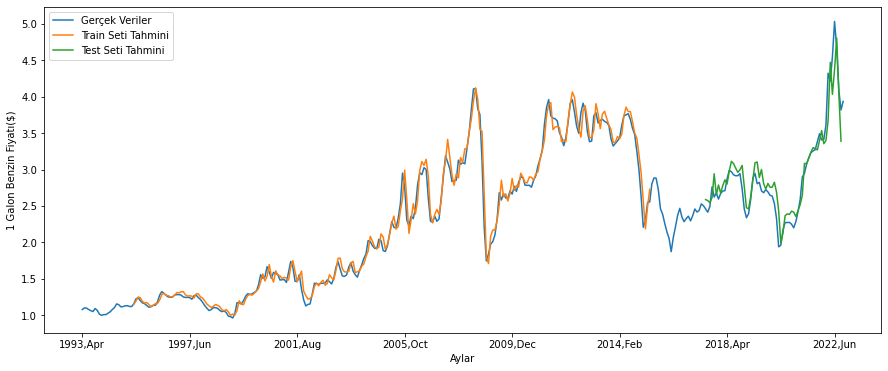

In [150]:
plt.figure(figsize = (15,6))
plt.plot(scaler.inverse_transform(df_sc))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["Gerçek Veriler","Train Seti Tahmini","Test Seti Tahmini"])
plt.xlabel("Aylar")
plt.ylabel("1 Galon Benzin Fiyatı($)")
plt.xticks(ticks = [0, 50, 100, 150, 200, 250, 300, 350], 
           labels = ["1993,Apr", "1997,Jun", "2001,Aug", "2005,Oct", "2009,Dec", "2014,Feb", "2018,Apr", "2022,Jun"])
plt.show()

In [164]:
df_test=pd.read_csv("test_data.csv")
df_test.head()

,Date,Prediction
0,1/11/2022,NaN
1,1/12/2022,NaN
2,1/1/2023,NaN
3,1/2/2023,NaN
4,1/3/2023,NaN


#### df_test için değerler bulunacak

Modeli Kaydediyorum

In [153]:
model.save("petrol price prediction")

INFO:tensorflow:Assets written to: prtrol price prediction\assets


INFO:tensorflow:Assets written to: prtrol price prediction\assets


# ARIMA

In [155]:
!pip install --upgrade patsy

  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.2
    Uninstalling patsy-0.5.2:
      Successfully uninstalled patsy-0.5.2


In [156]:
!pip install --upgrade --no-deps statsmodels

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2


In [157]:
from statsmodels.tsa.arima.model import ARIMA

In [159]:
df2

0      1.078
1      1.100
2      1.097
3      1.078
4      1.062
       ...  
350    5.032
351    4.668
352    4.087
353    3.817
354    3.935
Name: Petrol Fiyatı, Length: 355, dtype: float64

In [165]:
model1 = ARIMA(df2.values, order=(5,1,0))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=26)
output1

array([3.98635099, 4.03880373, 4.14111905, 4.21892862, 4.21899702,
       4.19466734, 4.17474261, 4.15476798, 4.13776579, 4.13359963,
       4.1387502 , 4.14514953, 4.15020466, 4.15384955, 4.155181  ,
       4.15429905, 4.15263106, 4.15124123, 4.15036889, 4.15003865,
       4.15019317, 4.15058727, 4.15095554, 4.15118314, 4.15126584,
       4.15123495])

In [162]:
df_test=pd.read_csv("test_data.csv")
df_test.head()

,Date,Prediction
0,1/11/2022,NaN
1,1/12/2022,NaN
2,1/1/2023,NaN
3,1/2/2023,NaN
4,1/3/2023,NaN


In [168]:
df_test["Prediction"] = output1
df_test.head()

,Date,Prediction
0,1/11/2022,3.986351
1,1/12/2022,4.038804
2,1/1/2023,4.141119
3,1/2/2023,4.218929
4,1/3/2023,4.218997


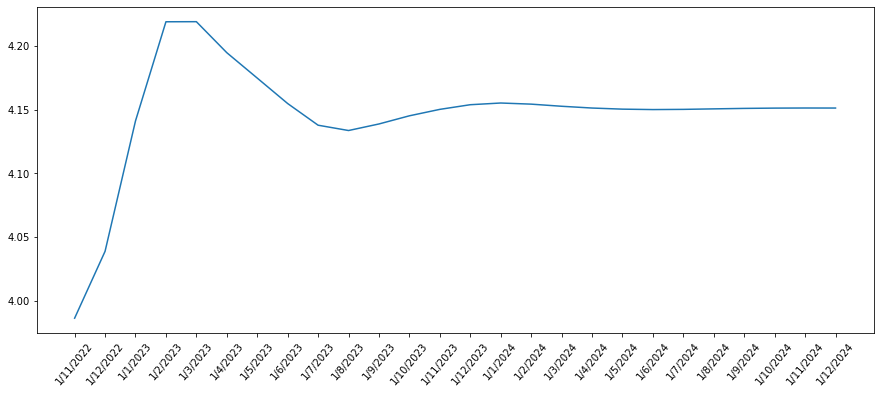

In [171]:
plt.figure(figsize = (15,6))
plt.plot(df_test["Date"],df_test["Prediction"])
plt.xticks(rotation=50)
plt.show()

# Auto Keras

In [173]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to c:\users\ogn_1\appdata\local\temp\pip-req-build-wcm1duwd
  Resolved https://github.com/keras-team/keras-tuner.git to commit 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-py3-none-any.whl size=86074 sha256=f20745dffdc87dba550a8d95ab17f89feac55d64f887fc87f9fa84038111524f
  Stored in directory: C:\Users\ogn_1\AppData\Local\Temp\pip-ephem-wheel-cache-fn47a2ey\wheels\09\45\88\7fa744f0be0acc5be797cd02899455d419c94645f428e79d15
Successfully built keras-tuner


  Running command git clone -q https://github.com/keras-team/keras-tuner.git 'C:\Users\ogn_1\AppData\Local\Temp\pip-req-build-wcm1duwd'
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629


In [174]:
!pip install autokeras

  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.0.2rc1
    Uninstalling keras-tuner-1.0.2rc1:
      Successfully uninstalled keras-tuner-1.0.2rc1


In [175]:
!pip show autokeras

Name: autokeras
Version: 1.0.20
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: c:\anaconda\lib\site-packages
Requires: keras-tuner, tensorflow, packaging, pandas
Required-by: 


In [176]:
import tensorflow as tf
import autokeras as ak

In [177]:
reg = ak.StructuredDataRegressor(overwrite=True, max_trials=3)

In [179]:
X_train, y_train = get_data(train_data, steps)
X_test, y_test = get_data(test_data, steps)

In [180]:
reg.fit(x=X_train, y=y_train, verbose=0)

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/19
8/8 [==============================] - 1s 1ms/step - loss: 1.6019 - mean_squared_error: 1.6019
Epoch 2/19
8/8 [==============================] - 0s 2ms/step - loss: 0.5439 - mean_squared_error: 0.5439
Epoch 3/19
8/8 [==============================] - 0s 1ms/step - loss: 0.2667 - mean_squared_error: 0.2667
Epoch 4/19
8/8 [==============================] - 0s 1ms/step - loss: 0.2634 - mean_squared_error: 0.2634
Epoch 5/19
8/8 [==============================] - 0s 1ms/step - loss: 0.2823 - mean_squared_error: 0.2823
Epoch 6/19
8/8 [==============================] - 0s 2ms/step - loss: 0.1986 - mean_squared_error: 0.1986
Epoch 7/19
8/8 [==============================] - 0s 1ms/step - loss: 0.1978 - mean_squared_error: 0.1978
Epoch 8/19
8/8 [==============================] - 0s 2ms/step - loss: 0.2036 - mean_squared_error: 0.2036
Epoch 9/19
8/8 [==============================] - 0s 1ms/step - loss: 0.1543 - mean_squared_error: 0.1543
Epoch 10/19
8/8 [=============================

INFO:tensorflow:Assets written to: .\structured_data_regressor\best_model\assets


In [182]:
yhat_test = reg.predict(X_test)

model = reg.export_model()

2/2 [==============================] - 0s 2ms/step


In [183]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 24)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 24)               49        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                800       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [184]:
yhat_train= reg.predict(X_train)

8/8 [==============================] - 0s 1ms/step


In [185]:
train_predict=scaler.inverse_transform(yhat_train)
test_predict=scaler.inverse_transform(yhat_test)

In [187]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,yhat_test)

0.028845733278035475

In [188]:
mean_squared_error(y_train,yhat_train)

0.013273751902662315